In [1]:
#Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/synthetic/attention_platform_monthly.csv")

In [2]:
#Feature Engineering
df["engagement_quality"] = (
    df["avg_session_duration_min"] * df["monthly_retention_rate"]
)

df["attention_intensity"] = (
    df["avg_daily_minutes"] / df["sessions_per_day"]
)

df["cognitive_load"] = (
    df["ads_per_hour"] + df["notifications_per_day"]
)

df["attention_efficiency_score"] = (
    (df["engagement_quality"] *
     df["attention_intensity"] *
     df["content_refresh_rate"])
    / df["cognitive_load"]
)

In [3]:
df["cognitive_load"] += 0.01

In [4]:
#3.Platform-Level AES Ranking
aes_platform = (
    df.groupby("platform")["attention_efficiency_score"]
      .mean()
      .sort_values(ascending=False)
)

aes_platform

platform
Coursera       28.301564
Netflix        27.981474
YouTube        26.172405
Instagram      26.025956
Spotify        25.683939
Google News    22.370835
Name: attention_efficiency_score, dtype: float64

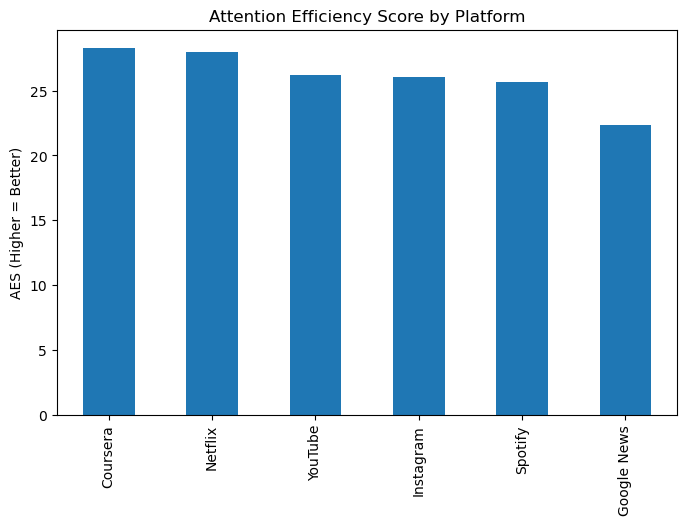

In [5]:
# 4.Visualization — Platform Ranking
plt.figure(figsize=(8,5))
aes_platform.plot(kind="bar")
plt.title("Attention Efficiency Score by Platform")
plt.ylabel("AES (Higher = Better)")
plt.xlabel("")
plt.show()

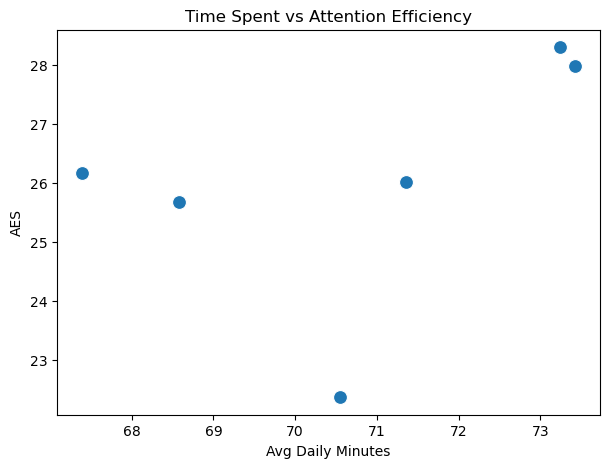

In [6]:
#5.Efficiency vs Time Spent (Critical Insight)
platform_summary = df.groupby("platform").agg({
    "avg_daily_minutes": "mean",
    "attention_efficiency_score": "mean"
}).reset_index()

plt.figure(figsize=(7,5))
sns.scatterplot(
    data=platform_summary,
    x="avg_daily_minutes",
    y="attention_efficiency_score",
    s=100
)

plt.title("Time Spent vs Attention Efficiency")
plt.xlabel("Avg Daily Minutes")
plt.ylabel("AES")
plt.show()

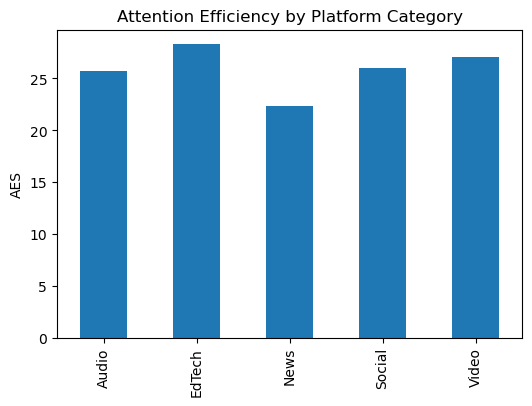

In [7]:
#6.Category-Level Comparison
category_aes = df.groupby("category")["attention_efficiency_score"].mean()
category_aes.plot(kind="bar", figsize=(6,4))
plt.title("Attention Efficiency by Platform Category")
plt.ylabel("AES")
plt.xlabel("")
plt.show()

# 8Markdown Insights 

Sample Insights

EdTech platforms show higher attention efficiency despite lower time spent

Social platforms consume maximum attention but score lower on efficiency

High notification pressure significantly reduces AES

Attention efficiency is a better KPI than screen time

✅ Phase 3 Completion Checklist

✔ Custom metric created
✔ Metric justified logically
✔ Rankings generated
✔ Strategic insights written